<a href="https://colab.research.google.com/github/Stigggggg/UWr/blob/main/Zad2L1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Needed imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Preprocessing data and preparations for the algorithm
mnist = fetch_openml('mnist_784')
x, y = mnist.data / 255, mnist.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
accuracies = []
cv = LeaveOneOut()

In [ ]:
# Algorithm
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  predictions = 0
  for i, j in cv.split(x_train):
    x_train_cv, x_test_cv = x_train[i], x_train[j]
    y_train_cv, y_test_cv = y_train[i], y_train[j]
    knn.fit(x_train_cv, y_train_cv)
    pred = knn.predict(x_test_cv)
    if pred == y_test_cv:
      predictions += 1
  acc = predictions / len(x_train)
  accuracies.append(acc)

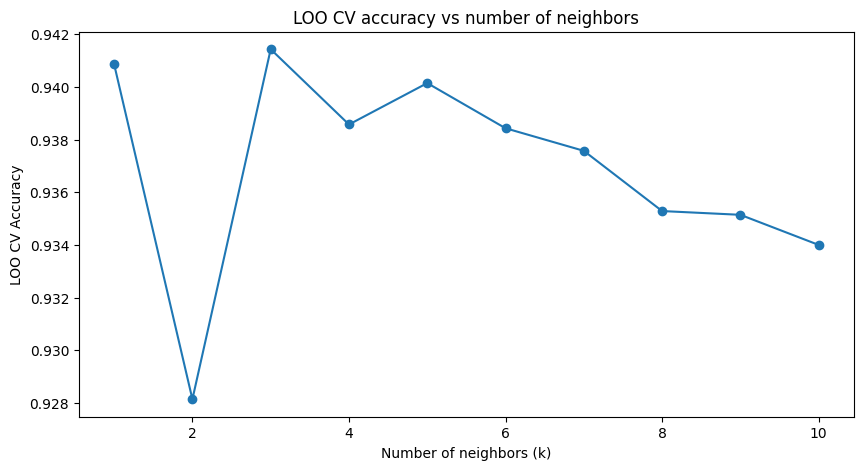

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('LOO CV Accuracy')
plt.title('LOO CV accuracy vs number of neighbors')
plt.show()
